In [249]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [250]:
forestfires = pd.read_csv("forestfires.csv")
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [251]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)

In [252]:
forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [253]:
forestfires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [254]:
forestfires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [255]:
forestfires.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
##I am taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1

In [257]:
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

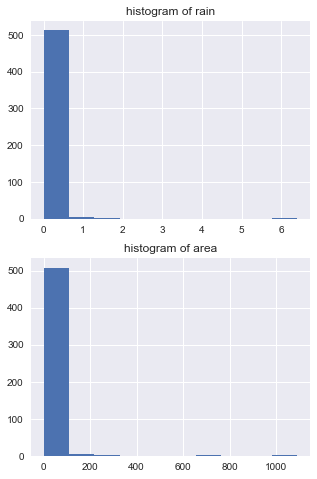

In [258]:
# natural logarithm scaling (+1 to prevent errors at 0)
forestfires.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

# Train Test Split

In [259]:
X = forestfires.iloc[:,0:28]
y = forestfires.iloc[:,28]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [261]:
X_train=tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train=tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test=tf.convert_to_tensor(y_test, dtype=tf.float32)

# Feature Scaling: StandardScaler

In [262]:
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)

In [263]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])

In [264]:
X_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
1,-0.057455,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
2,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
3,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
4,-1.320304,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923,-0.48795,...,-0.172345,7.141428,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715


# Neural Network

In [265]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=28, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 6)                 174       
                                                                 
 dense_61 (Dense)            (None, 6)                 42        
                                                                 
 dense_62 (Dense)            (None, 6)                 42        
                                                                 
 dropout_15 (Dropout)        (None, 6)                 0         
                                                                 
 dense_63 (Dense)            (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [266]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')

In [267]:
# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 2s 12ms/step - loss: 5.3309 - accuracy: 0.3172 - val_loss: 1.2153 - val_accuracy: 0.2692
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 2.8044 - accuracy: 0.3947 - val_loss: 0.8357 - val_accuracy: 0.3846
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.8450 - accuracy: 0.4673 - val_loss: 0.6803 - val_accuracy: 0.5096
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.4636 - accuracy: 0.5545 - val_loss: 0.6261 - val_accuracy: 0.5962
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 1.3740 - accuracy: 0.5956 - val_loss: 0.6055 - val_accuracy: 0.6442
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.1612 - accuracy: 0.5835 - val_loss: 0.5884 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.6441 - val_loss: 0.5771 - val_accuracy: 0.7692
Epoch 8/100


Epoch 59/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9177 - val_loss: 0.1467 - val_accuracy: 0.9423
Epoch 60/100
42/42 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9080 - val_loss: 0.1449 - val_accuracy: 0.9423
Epoch 61/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9419 - val_loss: 0.1441 - val_accuracy: 0.9423
Epoch 62/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1710 - accuracy: 0.9298 - val_loss: 0.1444 - val_accuracy: 0.9423
Epoch 63/100
42/42 [==============================] - 0s 5ms/step - loss: 0.2098 - accuracy: 0.9249 - val_loss: 0.1466 - val_accuracy: 0.9423
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9346 - val_loss: 0.1469 - val_accuracy: 0.9423
Epoch 65/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9370 - val_loss: 0.1493 - val_accuracy: 0.9423
Epoch 

In [271]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.985, Valid: 0.952


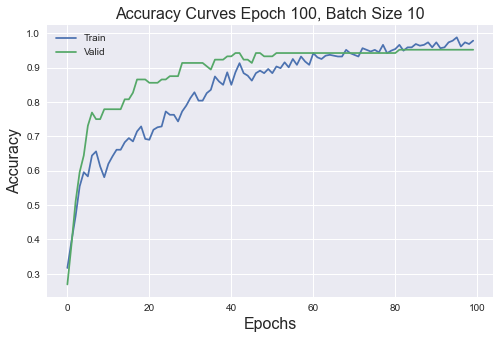

In [269]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()